#### Data preprocessing

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import scale
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, plot_confusion_matrix
from sklearn.ensemble import GradientBoostingClassifier
from catboost import CatBoostClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.metrics import f1_score
import pickle
from warnings import filterwarnings
filterwarnings('ignore')

In [2]:
df = pd.read_csv('winequality-white.csv')
df

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
...,...,...,...,...,...,...,...,...,...,...,...,...
4893,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6
4894,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5
4895,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6
4896,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7


In [3]:
df1 = pd.read_csv('winequality-red.csv')
df.columns  = df1.columns
df.to_csv('winequality-white.csv',index = False)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed_acidity         4898 non-null   float64
 1   volatile_acidity      4898 non-null   float64
 2   citric_acid           4898 non-null   float64
 3   residual_sugar        4898 non-null   float64
 4   chlorides             4898 non-null   float64
 5   free_sulfur_dioxide   4898 non-null   float64
 6   total_sulfur_dioxide  4898 non-null   float64
 7   density               4898 non-null   float64
 8   pH                    4898 non-null   float64
 9   sulphates             4898 non-null   float64
 10  alcohol               4898 non-null   float64
 11  quality               4898 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 459.3 KB


In [5]:
df.isnull().sum()

fixed_acidity           0
volatile_acidity        0
citric_acid             0
residual_sugar          0
chlorides               0
free_sulfur_dioxide     0
total_sulfur_dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
fixed_acidity,4898.0,6.854788,0.843868,3.80000,6.300000,6.80000,7.3000,14.20000
volatile_acidity,4898.0,0.278241,0.100795,0.08000,0.210000,0.26000,0.3200,1.10000
citric_acid,4898.0,0.334192,0.121020,0.00000,0.270000,0.32000,0.3900,1.66000
residual_sugar,4898.0,6.391415,5.072058,0.60000,1.700000,5.20000,9.9000,65.80000
chlorides,4898.0,0.045772,0.021848,0.00900,0.036000,0.04300,0.0500,0.34600
free_sulfur_dioxide,4898.0,35.308085,17.007137,2.00000,23.000000,34.00000,46.0000,289.00000
total_sulfur_dioxide,4898.0,138.360657,42.498065,9.00000,108.000000,134.00000,167.0000,440.00000
density,4898.0,0.994027,0.002991,0.98711,0.991723,0.99374,0.9961,1.03898
pH,4898.0,3.188267,0.151001,2.72000,3.090000,3.18000,3.2800,3.82000
sulphates,4898.0,0.489847,0.114126,0.22000,0.410000,0.47000,0.5500,1.08000


In [7]:
df.corr()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
fixed_acidity,1.000000,-0.022697,0.289181,0.089021,0.023086,-0.049396,0.091070,0.265331,-0.425858,-0.017143,-0.120881,-0.113663
volatile_acidity,-0.022697,1.000000,-0.149472,0.064286,0.070512,-0.097012,0.089261,0.027114,-0.031915,-0.035728,0.067718,-0.194723
citric_acid,0.289181,-0.149472,1.000000,0.094212,0.114364,0.094077,0.121131,0.149503,-0.163748,0.062331,-0.075729,-0.009209
residual_sugar,0.089021,0.064286,0.094212,1.000000,0.088685,0.299098,0.401439,0.838966,-0.194133,-0.026664,-0.450631,-0.097577
chlorides,0.023086,0.070512,0.114364,0.088685,1.000000,0.101392,0.198910,0.257211,-0.090439,0.016763,-0.360189,-0.209934
free_sulfur_dioxide,-0.049396,-0.097012,0.094077,0.299098,0.101392,1.000000,0.615501,0.294210,-0.000618,0.059217,-0.250104,0.008158
total_sulfur_dioxide,0.091070,0.089261,0.121131,0.401439,0.198910,0.615501,1.000000,0.529881,0.002321,0.134562,-0.448892,-0.174737
density,0.265331,0.027114,0.149503,0.838966,0.257211,0.294210,0.529881,1.000000,-0.093591,0.074493,-0.780138,-0.307123
pH,-0.425858,-0.031915,-0.163748,-0.194133,-0.090439,-0.000618,0.002321,-0.093591,1.000000,0.155951,0.121432,0.099427
sulphates,-0.017143,-0.035728,0.062331,-0.026664,0.016763,0.059217,0.134562,0.074493,0.155951,1.000000,-0.017433,0.053678


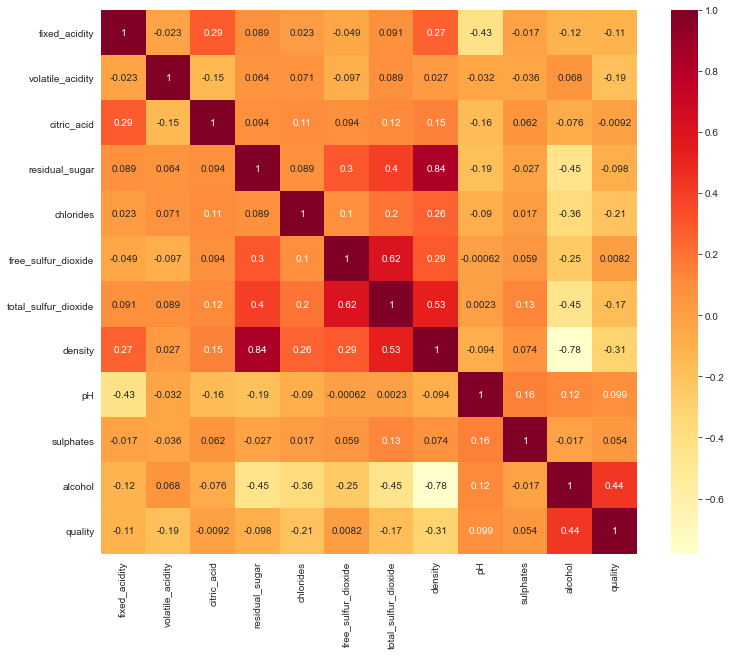

In [8]:
sns.set_style("darkgrid")
plt.figure(figsize=(12, 10))
sns.heatmap(df.corr(),annot=True,cmap='YlOrRd');

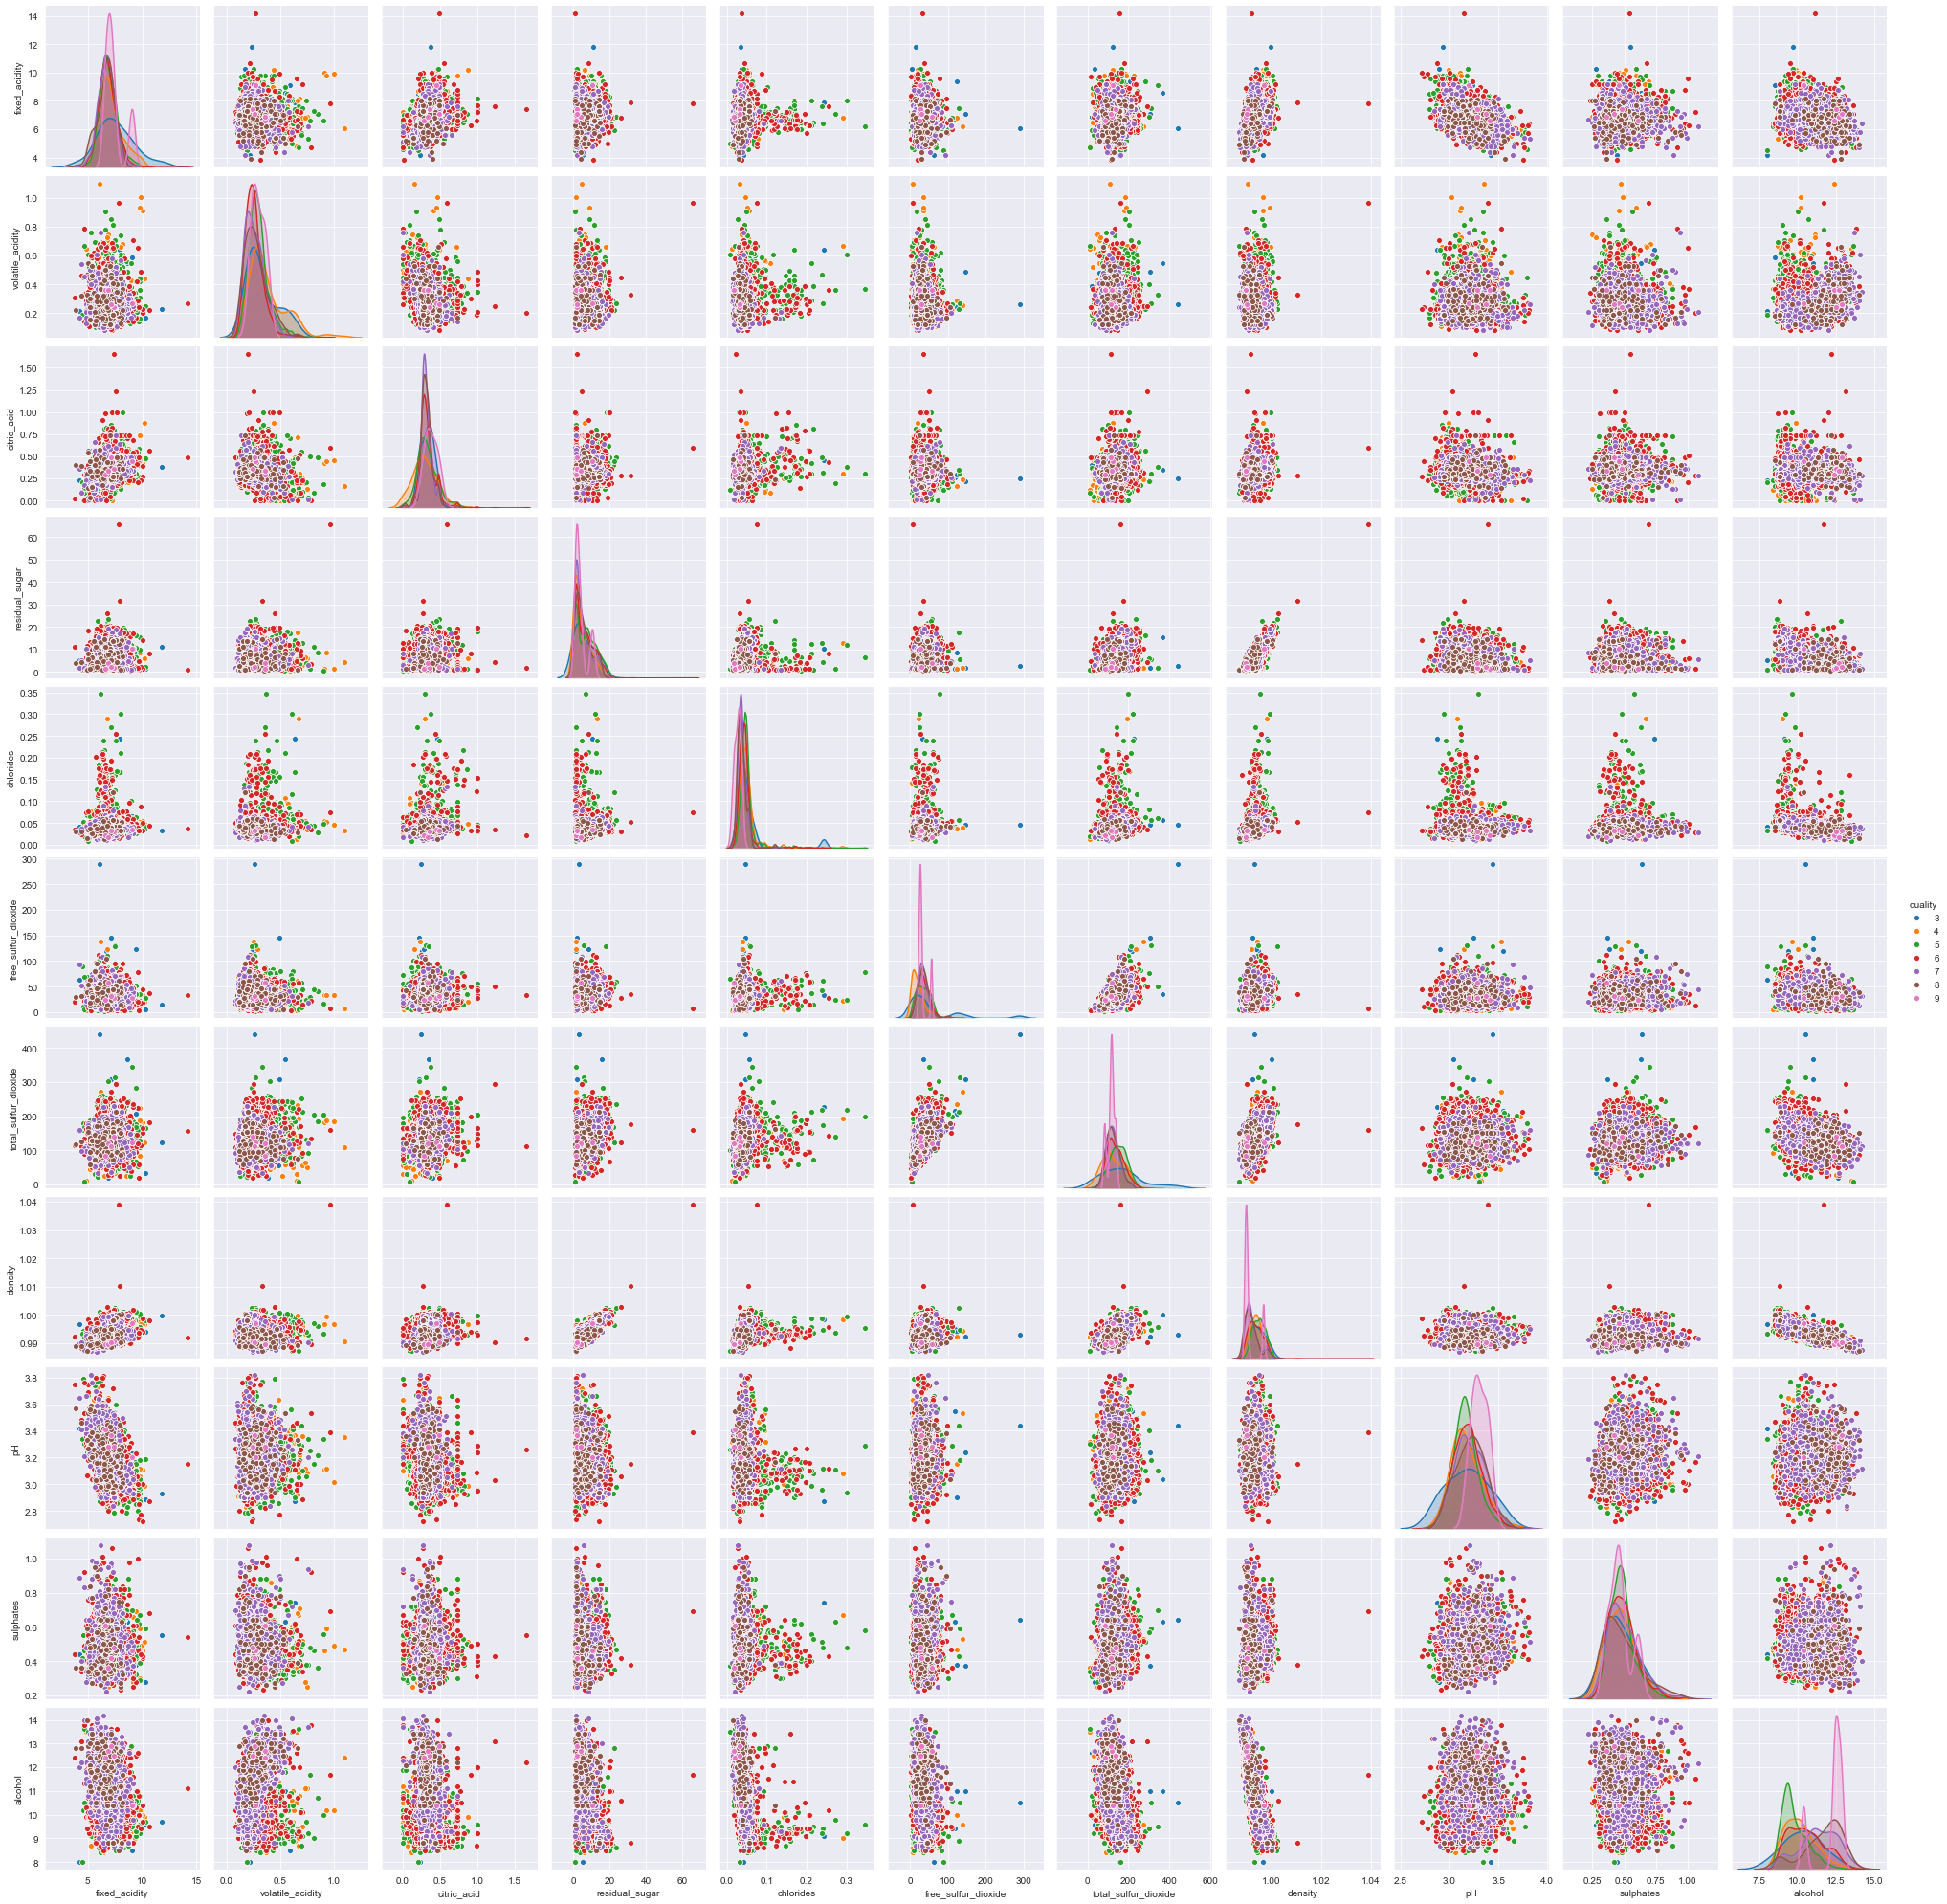

In [9]:
sns.pairplot(df,hue='quality');

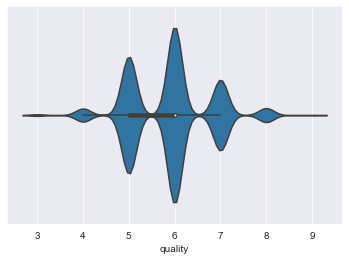

In [10]:
sns.violinplot(x = df['quality']);

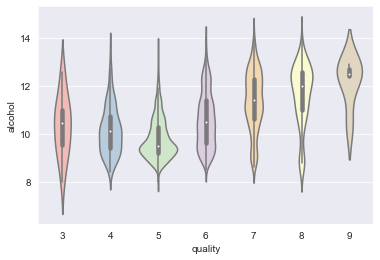

In [11]:
sns.violinplot(x = df['quality'],y = df['alcohol'],palette="Pastel1");

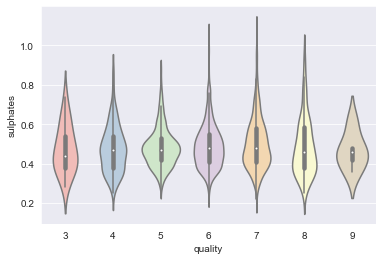

In [12]:
sns.violinplot(x = df['quality'],y = df['sulphates'],palette="Pastel1");

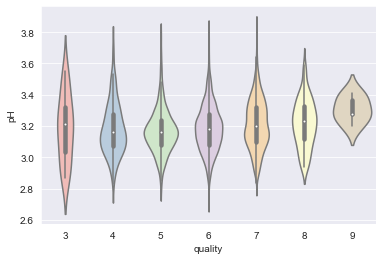

In [13]:
sns.violinplot(x = df['quality'],y = df['pH'],palette="Pastel1");

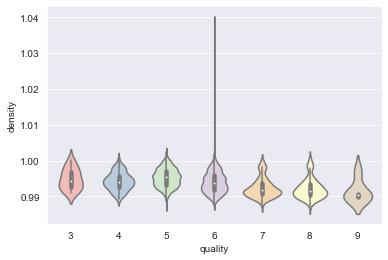

In [14]:
sns.violinplot(x = df['quality'],y = df['density'],palette="Pastel1");

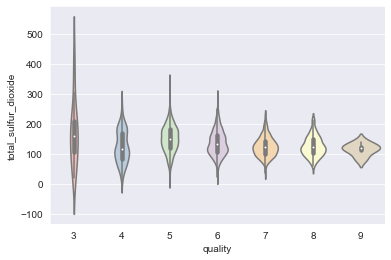

In [15]:
sns.violinplot(x = df['quality'],y = df['total_sulfur_dioxide'],palette="Pastel1");

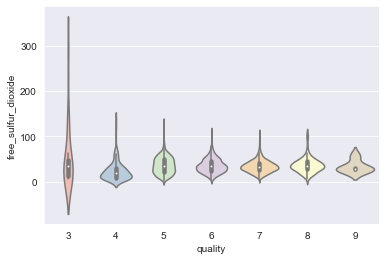

In [16]:
sns.violinplot(x = df['quality'],y = df['free_sulfur_dioxide'],palette="Pastel1");

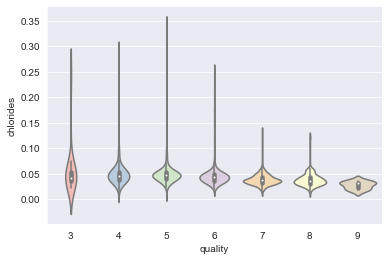

In [17]:
sns.violinplot(x = df['quality'],y = df['chlorides'],palette="Pastel1");

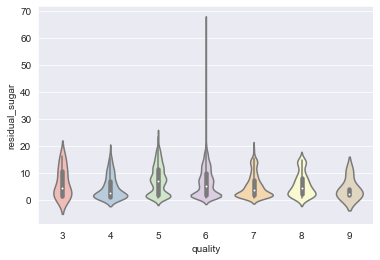

In [18]:
sns.violinplot(x = df['quality'],y = df['residual_sugar'],palette="Pastel1");

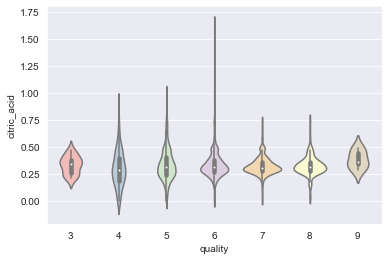

In [19]:
sns.violinplot(x = df['quality'],y = df['citric_acid'],palette="Pastel1");

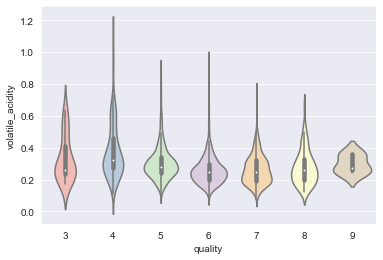

In [20]:
sns.violinplot(x = df['quality'],y = df['volatile_acidity'],palette="Pastel1");

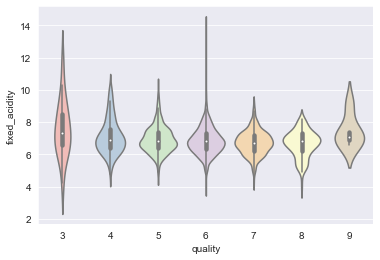

In [21]:
sns.violinplot(x = df['quality'],y = df['fixed_acidity'],palette="Pastel1");

#### Splitting test-train

In [22]:
y = df['quality'].apply(lambda x:0 if x<=4 else(2 if x>=7 else 1))
X = df.drop(['quality'],axis=1)

In [23]:
print(X.shape)
print(y.shape)

(4898, 11)
(4898,)


In [24]:
y.value_counts()

1    3655
2    1060
0     183
Name: quality, dtype: int64

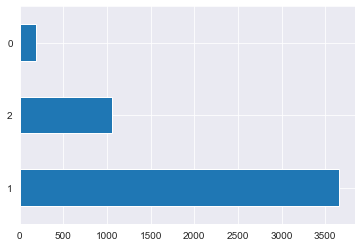

In [25]:
y.value_counts().plot.barh();

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state=42)

#### Gradient Boosting Machines

In [27]:
gbm = GradientBoostingClassifier()
gbm_model = gbm.fit(X_train,y_train)
y_pred_gbm = gbm_model.predict(X_test)
print('f1_score: ',f1_score(y_test,gbm_model.predict(X_test),average=None))
print('Acc score:',accuracy_score(y_test,y_pred_gbm))

f1_score:  [0.15625    0.8694908  0.53061224]
Acc score: 0.7918367346938775


In [28]:
gbm_params = {'learning_rate': [0.01,0.1],
             'n_estimators':[100,500],
             'max_depth':[3,5],
             'min_samples_split':[2,5]}

In [29]:
gbm = GradientBoostingClassifier()

gbm_cv = GridSearchCV(gbm,gbm_params,cv = 5,n_jobs = -1,verbose = 2)
gbm_cv.fit(X_train,y_train)

Fitting 5 folds for each of 16 candidates, totalling 80 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:  2.6min
[Parallel(n_jobs=-1)]: Done  80 out of  80 | elapsed:  8.2min finished


GridSearchCV(cv=5, estimator=GradientBoostingClassifier(), n_jobs=-1,
             param_grid={'learning_rate': [0.01, 0.1], 'max_depth': [3, 5],
                         'min_samples_split': [2, 5],
                         'n_estimators': [100, 500]},
             verbose=2)

In [30]:
gbm_cv.best_params_

{'learning_rate': 0.1,
 'max_depth': 5,
 'min_samples_split': 2,
 'n_estimators': 500}

In [31]:
gbm = GradientBoostingClassifier(learning_rate=0.1,
 max_depth=5,
 min_samples_split=2,
 n_estimators=500)
gbm_model = gbm.fit(X_train,y_train)
y_pred_gbm = gbm_model.predict(X_test)
print('f1_score: ',f1_score(y_test,gbm_model.predict(X_test),average=None))
print('Acc score:',accuracy_score(y_test,y_pred_gbm))

f1_score:  [0.36619718 0.89890591 0.67808219]
Acc score: 0.8421768707482993


              precision    recall  f1-score   support

           0       0.54      0.28      0.37        47
           1       0.86      0.94      0.90      1094
           2       0.78      0.60      0.68       329

    accuracy                           0.84      1470
   macro avg       0.73      0.61      0.65      1470
weighted avg       0.83      0.84      0.83      1470



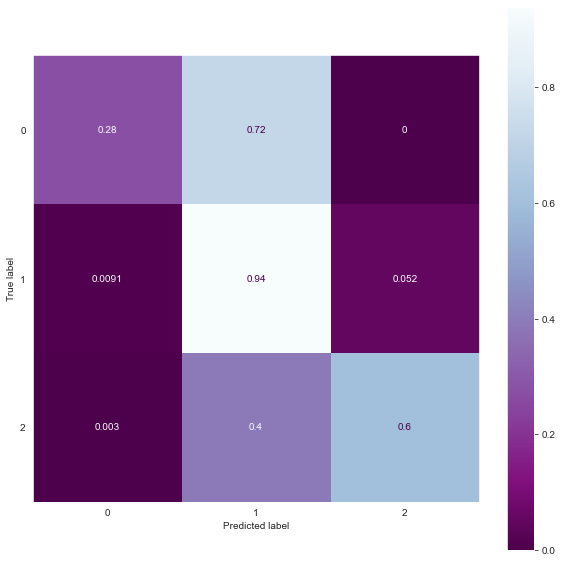

In [32]:
print(classification_report(y_test, y_pred_gbm))
fig, ax = plt.subplots(figsize=(10, 10))
ax.grid(False)
plot_confusion_matrix(gbm_model, X_test, y_test,normalize='true', cmap='BuPu_r', ax=ax)
plt.show()

#### XGBM

In [33]:
xgbm = XGBClassifier()
xgbm_model = xgbm.fit(X_train,y_train)
y_pred_xgbm = xgbm_model.predict(X_test)
print('f1_score: ',f1_score(y_test,xgbm_model.predict(X_test),average=None))
print('Acc score:',accuracy_score(y_test,y_pred_xgbm))

f1_score:  [0.34375    0.90122378 0.68707483]
Acc score: 0.8462585034013606


In [34]:
xgbm_params = {'learning_rate': [0.01,0.1],
             'n_estimators':[100,500],
             'max_depth':[3,5]}

In [35]:
xgbm = XGBClassifier()
xgbm_cv = GridSearchCV(xgbm,xgbm_params,cv = 5,n_jobs = -1,verbose = 2)
xgbm_cv.fit(X_train,y_train)

Fitting 5 folds for each of 8 candidates, totalling 40 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:   49.1s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:  1.1min finished


GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, gamma=None,
                                     gpu_id=None, importance_type='gain',
                                     interaction_constraints=None,
                                     learning_rate=None, max_delta_step=None,
                                     max_depth=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n_jobs=None,
                                     num_parallel_tree=None, random_state=None,
                                     reg_alpha=None, reg_lambda=None,
                                     scale_pos_weight=None, subsample=None,
                                     tree_method=None,

In [36]:
xgbm_cv.best_params_

{'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 500}

In [37]:
xgbm = XGBClassifier(learning_rate=0.1,
 max_depth=5,
 n_estimators=500)
xgbm_model = xgbm.fit(X_train,y_train)
y_pred_xgbm = xgbm_model.predict(X_test)
print('f1_score: ',f1_score(y_test,xgbm_model.predict(X_test),average=None))
print('Acc score:',accuracy_score(y_test,y_pred_xgbm))

f1_score:  [0.35820896 0.902407   0.69047619]
Acc score: 0.8476190476190476


              precision    recall  f1-score   support

           0       0.60      0.26      0.36        47
           1       0.87      0.94      0.90      1094
           2       0.78      0.62      0.69       329

    accuracy                           0.85      1470
   macro avg       0.75      0.60      0.65      1470
weighted avg       0.84      0.85      0.84      1470



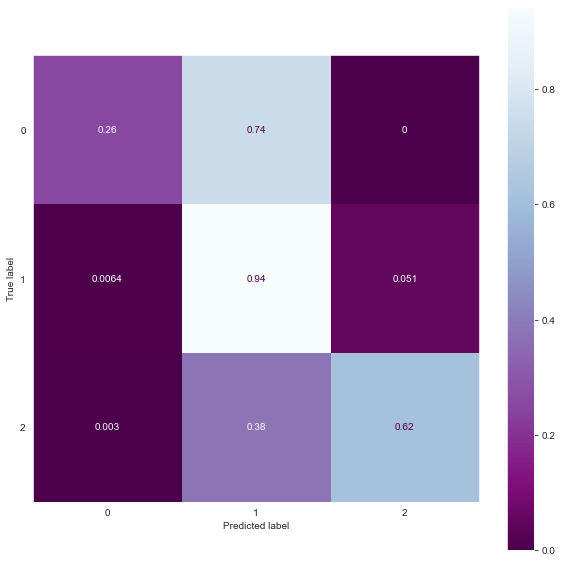

In [38]:
print(classification_report(y_test, y_pred_xgbm))
fig, ax = plt.subplots(figsize=(10, 10))
ax.grid(False)
plot_confusion_matrix(xgbm_model, X_test, y_test,normalize='true', cmap='BuPu_r', ax=ax)
plt.show()

#### LightGBM

In [39]:
lxgbm = LGBMClassifier()
lxgbm_model = lxgbm.fit(X_train,y_train)
y_pred_lxgbm = lxgbm_model.predict(X_test)
print('f1_score: ',f1_score(y_test,lxgbm_model.predict(X_test),average=None))
print('Acc score:',accuracy_score(y_test,y_pred_lxgbm))

f1_score:  [0.28125    0.90013083 0.68610635]
Acc score: 0.8442176870748299


In [40]:
lxgbm_params = {'learning_rate': [0.01,0.1],
             'n_estimators':[100,500],
             'max_depth':[3,5],
             'min_child_samples':[5,10,20]}

In [41]:
lxgbm = LGBMClassifier()
lxgbm_cv = GridSearchCV(lxgbm,lxgbm_params,cv = 5,n_jobs = -1,verbose = 2)
lxgbm_cv.fit(X_train,y_train)

Fitting 5 folds for each of 24 candidates, totalling 120 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:   13.0s
[Parallel(n_jobs=-1)]: Done 120 out of 120 | elapsed:  1.1min finished


[LightGBM] [Warning] Accuracy may be bad since you didn't set num_leaves and 2^max_depth > num_leaves


GridSearchCV(cv=5, estimator=LGBMClassifier(), n_jobs=-1,
             param_grid={'learning_rate': [0.01, 0.1], 'max_depth': [3, 5],
                         'min_child_samples': [5, 10, 20],
                         'n_estimators': [100, 500]},
             verbose=2)

In [42]:
lxgbm_cv.best_params_

{'learning_rate': 0.1,
 'max_depth': 5,
 'min_child_samples': 5,
 'n_estimators': 500}

In [43]:
lxgbm = LGBMClassifier(learning_rate=0.1,
 max_depth=5,
 n_estimators=500,
 min_child_samples=5)
lxgbm_model = lxgbm.fit(X_train,y_train)
y_pred_lxgbm = lxgbm_model.predict(X_test)
print('f1_score: ',f1_score(y_test,lxgbm_model.predict(X_test),average=None))
print('Acc score:',accuracy_score(y_test,y_pred_lxgbm))

f1_score:  [0.34375    0.90113736 0.68813559]
Acc score: 0.8462585034013606


              precision    recall  f1-score   support

           0       0.65      0.23      0.34        47
           1       0.86      0.94      0.90      1094
           2       0.78      0.62      0.69       329

    accuracy                           0.85      1470
   macro avg       0.76      0.60      0.64      1470
weighted avg       0.84      0.85      0.84      1470



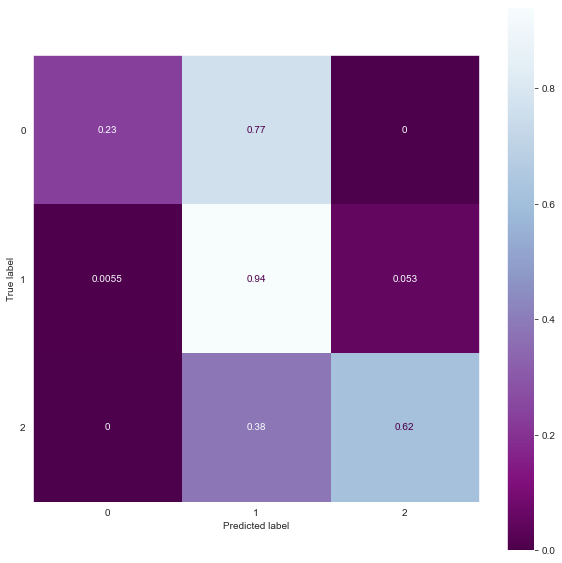

In [44]:
print(classification_report(y_test, y_pred_lxgbm))
fig, ax = plt.subplots(figsize=(10, 10))
ax.grid(False)
plot_confusion_matrix(lxgbm_model, X_test, y_test,normalize='true', cmap='BuPu_r', ax=ax)
plt.show()

#### CatBoost

In [45]:
cgbm = CatBoostClassifier()
cgbm_model = cgbm.fit(X_train,y_train)
y_pred_cgbm = cgbm_model.predict(X_test)
print('f1_score: ',f1_score(y_test,cgbm_model.predict(X_test),average=None))
print('Acc score:',accuracy_score(y_test,y_pred_cgbm))

Learning rate set to 0.084258
0:	learn: 1.0232035	total: 63.2ms	remaining: 1m 3s
1:	learn: 0.9635464	total: 73.2ms	remaining: 36.5s
2:	learn: 0.9127962	total: 85.3ms	remaining: 28.3s
3:	learn: 0.8709206	total: 97.3ms	remaining: 24.2s
4:	learn: 0.8328878	total: 108ms	remaining: 21.4s
5:	learn: 0.8010536	total: 118ms	remaining: 19.6s
6:	learn: 0.7734063	total: 129ms	remaining: 18.4s
7:	learn: 0.7479197	total: 143ms	remaining: 17.7s
8:	learn: 0.7271627	total: 158ms	remaining: 17.4s
9:	learn: 0.7077609	total: 169ms	remaining: 16.8s
10:	learn: 0.6910176	total: 179ms	remaining: 16.1s
11:	learn: 0.6755032	total: 194ms	remaining: 16s
12:	learn: 0.6620870	total: 205ms	remaining: 15.6s
13:	learn: 0.6496360	total: 218ms	remaining: 15.4s
14:	learn: 0.6383577	total: 235ms	remaining: 15.4s
15:	learn: 0.6276069	total: 245ms	remaining: 15s
16:	learn: 0.6170438	total: 256ms	remaining: 14.8s
17:	learn: 0.6082324	total: 267ms	remaining: 14.6s
18:	learn: 0.5998569	total: 277ms	remaining: 14.3s
19:	learn: 

In [48]:
cbgm_params = {'iterations':[200,500],
              'learning_rate':[0.1,0.05],
              'depth':[5,8]}

In [49]:
cgbm = CatBoostClassifier()
cgbm_cv = GridSearchCV(cgbm,cbgm_params,cv = 5,n_jobs = -1,verbose = 2)
cgbm_cv.fit(X_train,y_train)

Fitting 5 folds for each of 8 candidates, totalling 40 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:  4.3min
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:  6.7min finished


0:	learn: 1.0094788	total: 45.1ms	remaining: 22.5s
1:	learn: 0.9430914	total: 89.3ms	remaining: 22.2s
2:	learn: 0.8876961	total: 136ms	remaining: 22.5s
3:	learn: 0.8398988	total: 179ms	remaining: 22.2s
4:	learn: 0.8001884	total: 224ms	remaining: 22.2s
5:	learn: 0.7662349	total: 277ms	remaining: 22.8s
6:	learn: 0.7359794	total: 322ms	remaining: 22.6s
7:	learn: 0.7086777	total: 368ms	remaining: 22.6s
8:	learn: 0.6857758	total: 417ms	remaining: 22.8s
9:	learn: 0.6663824	total: 473ms	remaining: 23.2s
10:	learn: 0.6479085	total: 516ms	remaining: 22.9s
11:	learn: 0.6317176	total: 564ms	remaining: 22.9s
12:	learn: 0.6168196	total: 607ms	remaining: 22.7s
13:	learn: 0.6029866	total: 650ms	remaining: 22.6s
14:	learn: 0.5915107	total: 696ms	remaining: 22.5s
15:	learn: 0.5792388	total: 739ms	remaining: 22.3s
16:	learn: 0.5695711	total: 788ms	remaining: 22.4s
17:	learn: 0.5612455	total: 833ms	remaining: 22.3s
18:	learn: 0.5530144	total: 886ms	remaining: 22.4s
19:	learn: 0.5453565	total: 931ms	remai

GridSearchCV(cv=5,
             estimator=<catboost.core.CatBoostClassifier object at 0x0000001F4B7338E0>,
             n_jobs=-1,
             param_grid={'depth': [5, 8], 'iterations': [200, 500],
                         'learning_rate': [0.1, 0.05]},
             verbose=2)

In [50]:
cgbm_cv.best_params_

{'depth': 8, 'iterations': 500, 'learning_rate': 0.1}

In [51]:
cgbm = CatBoostClassifier(depth=8,iterations=500,learning_rate=0.1)
cgbm_model = cgbm.fit(X_train,y_train)
y_pred_cgbm = cgbm_model.predict(X_test)
print('f1_score: ',f1_score(y_test,cgbm_model.predict(X_test),average=None))
print('Acc score:',accuracy_score(y_test,y_pred_cgbm))

0:	learn: 1.0094788	total: 57.9ms	remaining: 28.9s
1:	learn: 0.9430914	total: 107ms	remaining: 26.7s
2:	learn: 0.8876961	total: 170ms	remaining: 28.1s
3:	learn: 0.8398988	total: 222ms	remaining: 27.5s
4:	learn: 0.8001884	total: 316ms	remaining: 31.2s
5:	learn: 0.7662349	total: 411ms	remaining: 33.8s
6:	learn: 0.7359794	total: 479ms	remaining: 33.7s
7:	learn: 0.7086777	total: 558ms	remaining: 34.3s
8:	learn: 0.6857758	total: 607ms	remaining: 33.1s
9:	learn: 0.6663824	total: 661ms	remaining: 32.4s
10:	learn: 0.6479085	total: 710ms	remaining: 31.6s
11:	learn: 0.6317176	total: 780ms	remaining: 31.7s
12:	learn: 0.6168196	total: 836ms	remaining: 31.3s
13:	learn: 0.6029866	total: 888ms	remaining: 30.8s
14:	learn: 0.5915107	total: 935ms	remaining: 30.2s
15:	learn: 0.5792388	total: 985ms	remaining: 29.8s
16:	learn: 0.5695711	total: 1.03s	remaining: 29.3s
17:	learn: 0.5612455	total: 1.08s	remaining: 28.9s
18:	learn: 0.5530144	total: 1.13s	remaining: 28.5s
19:	learn: 0.5453565	total: 1.18s	remain

              precision    recall  f1-score   support

           0       0.60      0.13      0.21        47
           1       0.86      0.95      0.90      1094
           2       0.80      0.60      0.68       329

    accuracy                           0.85      1470
   macro avg       0.75      0.56      0.60      1470
weighted avg       0.84      0.85      0.83      1470



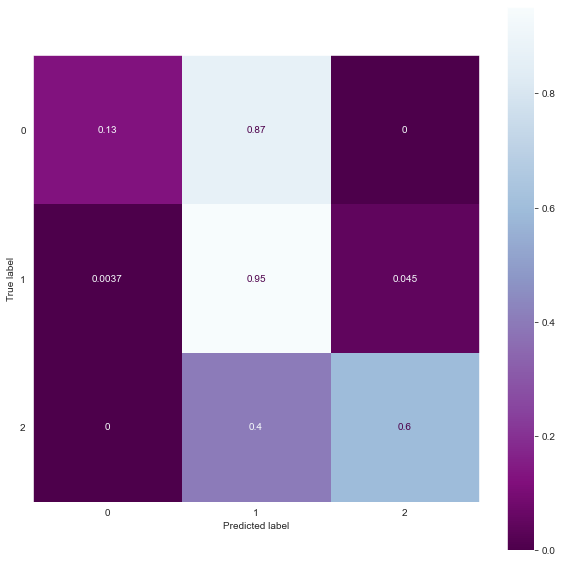

In [52]:
print(classification_report(y_test, y_pred_cgbm))
fig, ax = plt.subplots(figsize=(10, 10))
ax.grid(False)
plot_confusion_matrix(cgbm_model, X_test, y_test,normalize='true', cmap='BuPu_r', ax=ax)
plt.show()

#### Comparison

In [53]:
print('Acc score:GBM',accuracy_score(y_test,y_pred_gbm))
print('Acc score:XGBM',accuracy_score(y_test,y_pred_xgbm))
print('Acc score:LighGBM',accuracy_score(y_test,y_pred_lxgbm))
print('Acc score:CatBoost',accuracy_score(y_test,y_pred_cgbm))

Acc score:GBM 0.8421768707482993
Acc score:XGBM 0.8476190476190476
Acc score:LighGBM 0.8462585034013606
Acc score:CatBoost 0.845578231292517
